In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
from plot_utils import cool_savefig

In [3]:
small_batches = np.zeros((2,1500*500))

In [4]:
medium_batches = np.zeros((2,30*500))

In [5]:
large_batches = np.zeros((2,500))

In [6]:
from glob import glob

filenames = sorted(list(glob('concentration_estimates/*.npz')))
len(filenames)

500

In [7]:
for sim_num in range(500):
    npzfile = np.load(filenames[sim_num])
    
    small_batches[:,sim_num*1500:(sim_num+1)*1500] = npzfile['small_batches']
    medium_batches[:,sim_num*30:(sim_num+1)*30] = npzfile['medium_batches']
    large_batches[:,sim_num] = npzfile['whole_sim']

In [8]:
small_batches_densities = small_batches[0,:]
small_batches_compositions = small_batches[1,:]

medium_batches_densities = medium_batches[0,:]
medium_batches_compositions = medium_batches[1,:]

large_batches_densities = large_batches[0,:]
large_batches_compositions = large_batches[1,:]

In [9]:
print(np.mean(small_batches_densities < np.inf))
print(np.mean(small_batches_compositions < np.inf))

print(np.mean(medium_batches_densities < np.inf))
print(np.mean(medium_batches_compositions < np.inf))

print(np.mean(large_batches_densities < np.inf))
print(np.mean(large_batches_compositions < np.inf))

0.9347546666666666
0.9999946666666667
1.0
1.0
1.0
1.0


In [10]:
def small_part(array, x): return array[array < x]
def finite_part(array): return small_part(array, np.inf)

In [11]:
def x_fmt(x, pos):
    return '$10^{}$'.format(x).replace('.0','').replace('.5', '')

In [12]:
from statsmodels.distributions.empirical_distribution import ECDF

In [13]:
def crest(index):
    return sns.color_palette("crest")[index]

def magma(index):
    return sns.color_palette("magma")[index]

# Density Heterogeneity

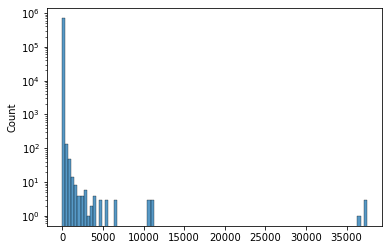

In [14]:
axis = sns.histplot(finite_part(small_batches_densities), bins=100)
axis.set_yscale("log")

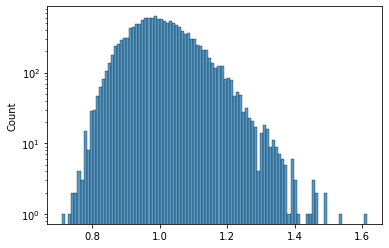

In [15]:
axis = sns.histplot(finite_part(medium_batches_densities), bins=100)
axis.set_yscale("log")

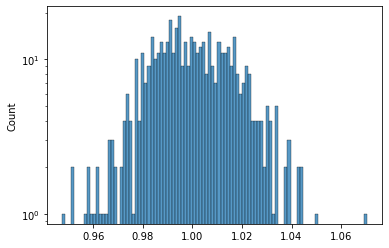

In [16]:
axis = sns.histplot(finite_part(large_batches_densities), bins=100)
axis.set_yscale("log")

OK so for CNBDM where in fact the density concentration is also finite, the estimator leads to something much more visually appealing + easy to understand. and almost all are finite, which is again good

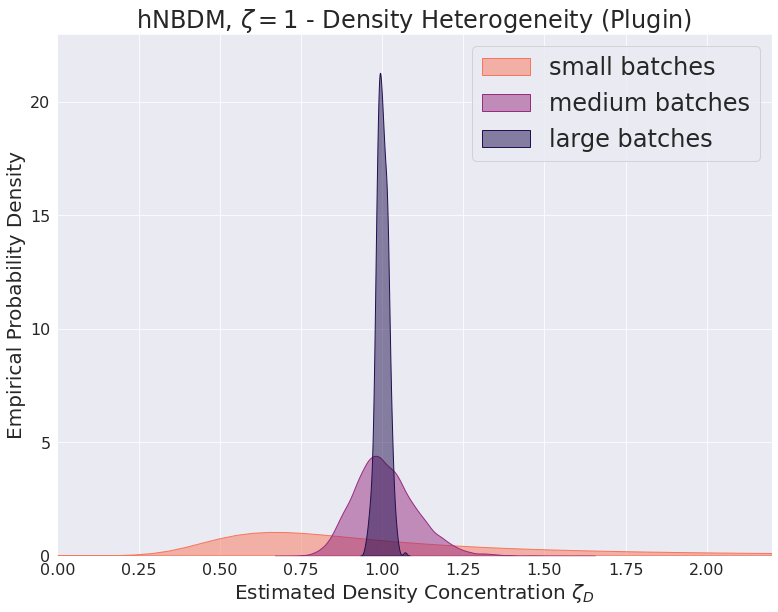

In [17]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(small_part(small_batches_densities, 10), color=magma(4),fill=True, alpha=0.5)
    sns.kdeplot(finite_part(medium_batches_densities), ax=axis, color=magma(2), fill=True, alpha=0.5)
    sns.kdeplot(finite_part(large_batches_densities), ax=axis, color=magma(0), fill=True, alpha=0.5)
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0,2.2))
    axis.set_ylim((0,23))
    title = 'hNBDM, $\zeta=1$ - Density Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title)

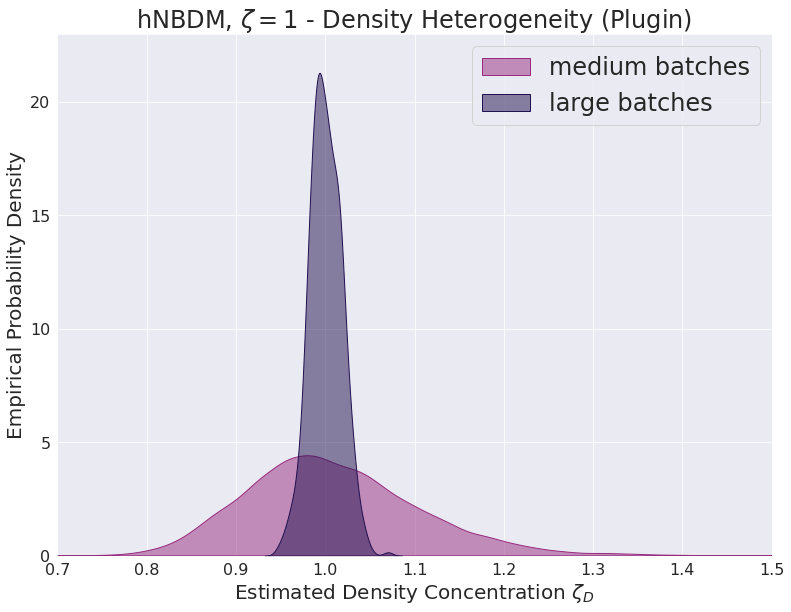

In [18]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(finite_part(medium_batches_densities), color=magma(2), fill=True, alpha=0.5)
    sns.kdeplot(finite_part(large_batches_densities), ax=axis, color=magma(0), fill=True, alpha=0.5)
    axis.legend(labels=["medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Density Concentration $\zeta_D$', fontsize=20)
    axis.tick_params(labelsize=16)
    title = 'hNBDM, $\zeta=1$ - Density Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    axis.set_xlim((0.7,1.5))
    axis.set_ylim((0,23))
    cool_savefig(title + ' zoom')

# Compositional Heterogeneity

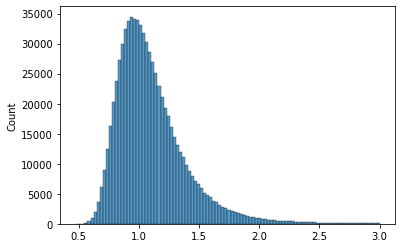

In [19]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100)


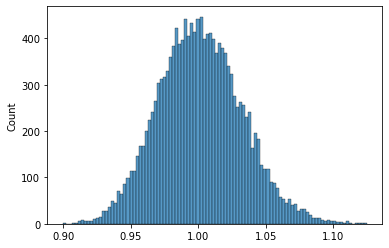

In [20]:
axis = sns.histplot(medium_batches_compositions, bins=100)

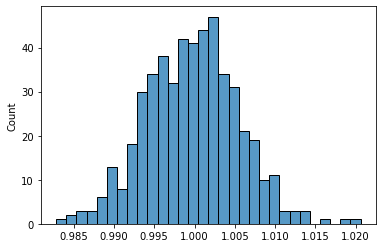

In [21]:
axis = sns.histplot(large_batches_compositions, bins=30)

<AxesSubplot:ylabel='Density'>

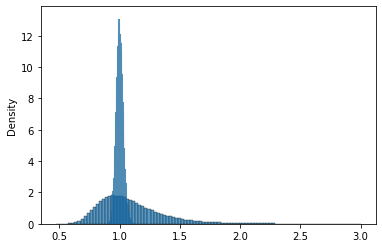

In [22]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100, stat="density")
sns.histplot(medium_batches_compositions, bins=100, ax=axis, stat="density")

<AxesSubplot:ylabel='Density'>

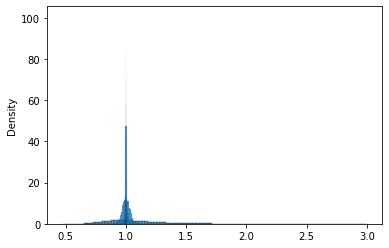

In [23]:
axis = sns.histplot(small_part(small_batches_compositions,3), bins=100, stat="density")
sns.histplot(medium_batches_compositions, bins=100, ax=axis, stat="density")
sns.histplot(large_batches_compositions, bins=100, ax=axis, stat="density")

<AxesSubplot:ylabel='Density'>

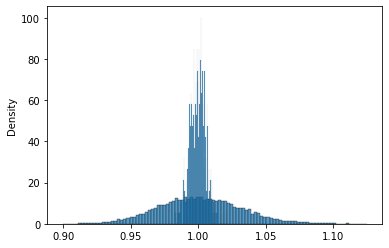

In [24]:
axis = sns.histplot(medium_batches_compositions, bins=100, stat="density")
sns.histplot(large_batches_compositions, bins=100, ax=axis, stat="density")

the difference between the large batches and medium batches is not as pronounced as it was for CPDM, but overall I have so say that all of these plots look remarkably similar to one another wow/cool

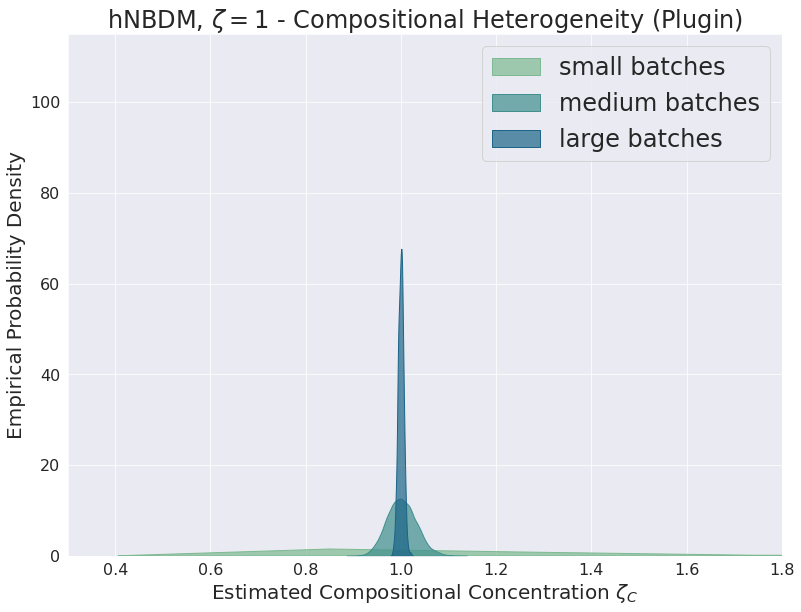

In [25]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(finite_part(small_batches_compositions), color=crest(0), fill=True, alpha=0.7)
    axis.set_xlim((0,2))
    sns.kdeplot(finite_part(medium_batches_compositions),  ax=axis, color=crest(2), fill=True, alpha=0.7)
    sns.kdeplot(finite_part(large_batches_compositions),  ax=axis, color=crest(4), fill=True, alpha=0.7)
    axis.legend(labels=["small batches", "medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$ ', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0.3,1.8))
    axis.set_ylim((0,115))
    title = 'hNBDM, $\zeta=1$ - Compositional Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title)

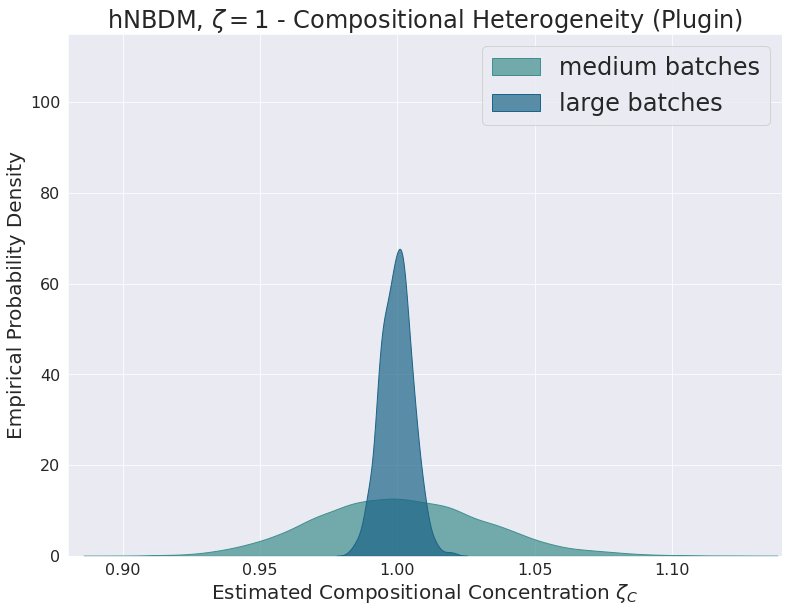

In [26]:
with sns.axes_style("darkgrid"):
    plt.figure(figsize=(12.8, 9.6))
    axis = sns.kdeplot(finite_part(medium_batches_compositions), color=crest(2), fill=True, alpha=0.7)
    sns.kdeplot(finite_part(large_batches_compositions),  ax=axis, color=crest(4), fill=True, alpha=0.7)
    axis.legend(labels=["medium batches", "large batches"], fontsize=24)
    axis.set_ylabel('Empirical Probability Density', fontsize=20)
    axis.set_xlabel('Estimated Compositional Concentration $\zeta_C$ ', fontsize=20)
    axis.tick_params(labelsize=16)
    axis.set_xlim((0.88,1.14))
    axis.set_ylim((0,115))
    title = 'hNBDM, $\zeta=1$ - Compositional Heterogeneity (Plugin)'
    plt.title(title, fontsize=24)
    cool_savefig(title + ' zoom')